## Regressão Linear Univariada:

### Apresente os dados utilizados, descrevendo o objetivo da análise e as variáveis de interesse.

O objetivo é verficar se o crescimento da polulação do brasil apresenta um crescimento linear ao longo dos anos de 1970 até 2022.

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

O dataset contem informações de vários países e suas populações ao longo do tempo e são apresentados no seguinte formato:

![imagem do dataset](./datasets/vW6J0k9.png)

Carrega o dataset da polulação mundial adquirido no link:
https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset/data

In [242]:
file = "./datasets/world_population.csv"
data = pd.read_csv(file)

Seleciona a população do brasil ao longo dos anos

In [243]:
brazil_population = data[data["Country/Territory"] == "Brazil"]

# Selecionar as colunas de população ao longo dos anos
years = [
    "2022 Population",
    "2020 Population",
    "2015 Population",
    "2010 Population",
    "2000 Population",
    "1990 Population",
    "1980 Population",
    "1970 Population",
]
brazil_population_values_millions = (brazil_population[years].values)[0] / 1000000
brazil_population_years = [
    [2022],
    [2020],
    [2015],
    [2010],
    [2000],
    [1990],
    [1980],
    [1970],
]

### Apresente o gráfico de dispersão entre a variável dependente e a variável independente. É possível perceber uma relação linear entre elas?

No gráfico apresentado é possível verificar visualmente que os dados não têm uma correlação linear ao longo do tempo. Porém entre os anos de 1970 e 2000 é possível verificar visualmente uma quase lineariadade.

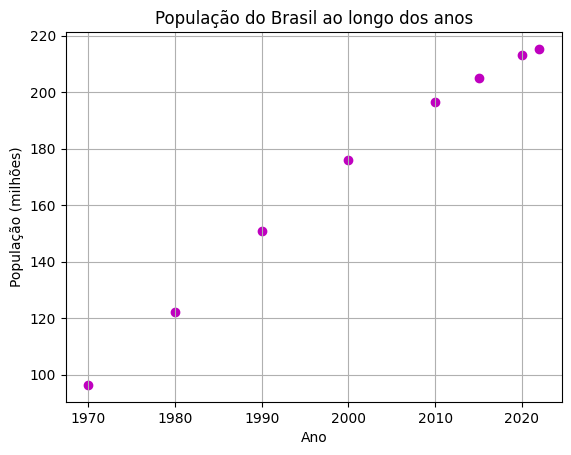

In [244]:
plt.figure()
plt.scatter(
    brazil_population_years, brazil_population_values_millions, marker="o", color="m"
)
plt.title("População do Brasil ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("População (milhões)")
plt.grid(True)
plt.show()

### Obtenha os parâmetros do modelo e estime a nova variável dependente. Desenhe-a no mesmo gráfico de dispersão anterior.

In [245]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [246]:
regr = LinearRegression()
regr.fit(brazil_population_years, brazil_population_values_millions)
brazil_population_values_millions_pred = regr.predict(brazil_population_years)

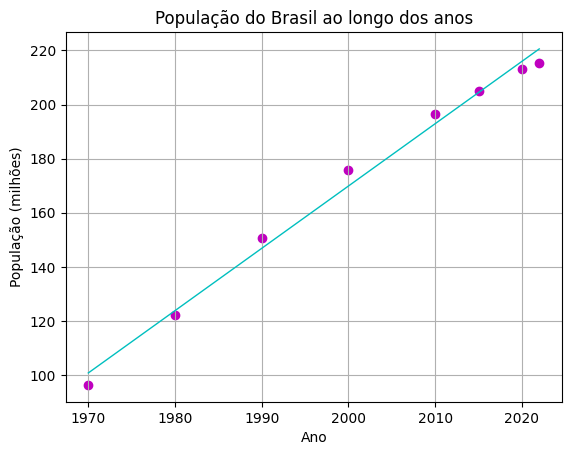

In [247]:
# Plot outputs
plt.scatter(
    brazil_population_years, brazil_population_values_millions, marker="o", color="m"
)
plt.plot(
    brazil_population_years,
    brazil_population_values_millions_pred,
    color="c",
    linewidth=1,
    linestyle="-",
)

plt.xlabel("Ano")
plt.ylabel("População (milhões)")
plt.title("População do Brasil ao longo dos anos")
plt.grid(True)
plt.show()

### Qual a raiz do erro médio quadrático (RMSE) e o coeficiente de determinação (R-square) obtidos para o modelo estimado nos dados de treinamento e de teste?

In [248]:
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse


def print_metrics(r2, mae, mse, rmse):
    print(f"MAE: {mae:.3f}") if mae is not None else None
    print(f"MSE: {mse:.3f}") if mse is not None else None
    print(f"RMSE: {rmse:.3f}") if rmse is not None else None
    print(f"Coeficiente de determinação R²: {r2:.3f}") if r2 is not None else None

In [249]:
r2, mae, mse, rmse = calculate_metrics(
    brazil_population_values_millions, brazil_population_values_millions_pred
)

print_metrics(r2, mae, mse, rmse)

MAE: 3.498
MSE: 15.003
RMSE: 3.873
Coeficiente de determinação R²: 0.991


Observando a linha de regressão e o coeficiente de determinação de 0.991 é possível dizer que apesar dos pontos com anos mais recentes apontarem para uma diminuição na taxa de crescimento, ao longo de todo o período é possível dizer que uma reta descreve o comportamento de crescimento da população.